---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [2]:
# !cat Employee_Movie_Choices.txt
def answer_one():
        
    # Your Code Here
    B=nx.read_edgelist('Employee_Movie_Choices.txt', delimiter='\t')
#     print(nx.bipartite.is_bipartite(B))
    return B# Your Answer Here

<IPython.core.display.Javascript object>


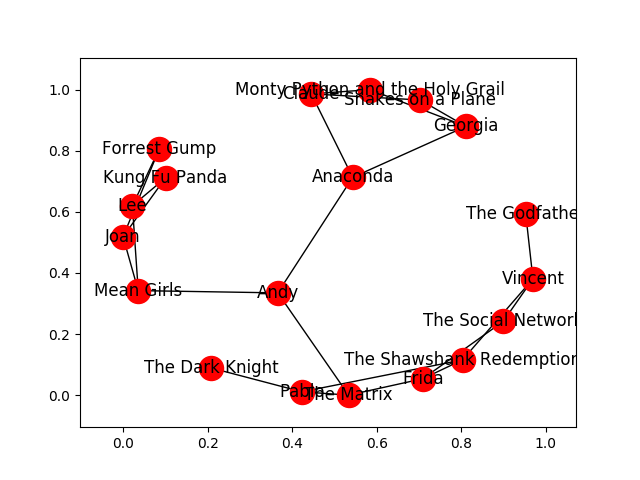

In [3]:
plot_graph(answer_one())

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [6]:
def answer_two():
    
    # Your Code Here
    G=answer_one()
    G.add_nodes_from(employees, type = 'employee')
    G.add_nodes_from(movies,type = 'movie')
    return G# Your Answer Here


In [7]:
answer_two()

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [8]:
def answer_three():
        
    # Your Code Here
    G = answer_two()
    return bipartite.weighted_projected_graph(G, employees)# Your Answer Here

<IPython.core.display.Javascript object>


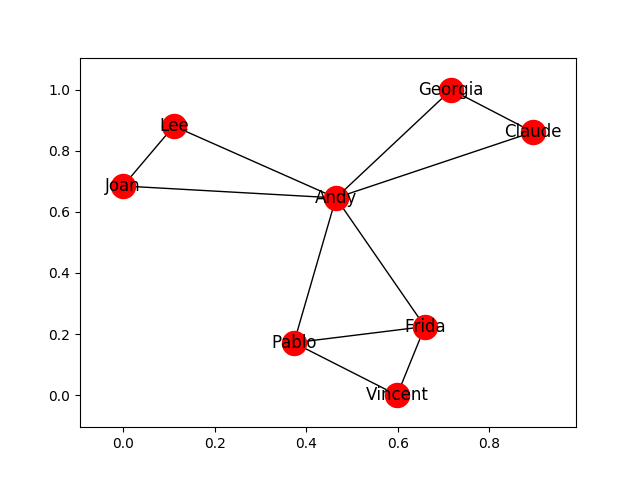

In [9]:
plot_graph(answer_three())

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [10]:
# !cat Employee_Relationships.txt
n_emp=len(employees)
find_hash_number=lambda a,b:a+n_emp*b if a<b else b+n_emp*a
def answer_four():
    
    line=0
    with  open("Employee_Relationships.txt", "r") as file:
        lines = file.readlines()
    
    i=0
    Employee_number = {}
    for emp in employees:
        Employee_number[emp]=i
        i+=1
    Employee_Relationships = {}
    
    i = 0
    for line in lines:
        line = line.split('\t')
        a = Employee_number[line[0]]
        b = Employee_number[line[1]]
        hashN = find_hash_number(a,b)
        Employee_Relationships[i]={'hash':hashN,'score':int(line[2])}
        i+=1
    df = pd.DataFrame(data=Employee_Relationships)
    df = df.T
    df.set_index('hash',inplace=True)

    G = answer_three()
    lst = [(find_hash_number(Employee_number[x[0]],Employee_number[x[1]]),x[2]['weight'])for x in G.edges(data=True)]
    df['weight']=[0 for a in range(len(df))]
    for x,y in lst:
        df['weight'][x]=y
    
    return df['score'].corr(df['weight'])# Your Answer Here

In [11]:
answer_four()

0.78839622217334748